In [6]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt 
import numpy as np

In [7]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()
X_train.shape 

170498071/170498071 [==============================] - 16s 0us/step


(50000, 32, 32, 3)

### Exploratory Data Analysis

In [8]:
X_test.shape

(10000, 32, 32, 3)

In [20]:
y_train.shape

(50000, 1)

In [25]:
y_train[:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

In [26]:
#reshape the 2d data
y_train=y_train.reshape(-1,)
y_train[:7]

array([6, 9, 9, 4, 1, 1, 2], dtype=uint8)

In [28]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [1]:
pip install tensorflow



[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [30]:
classes[1]

'automobile'

In [45]:
def plot_smpl(X,y,index):
    plt.figure(figsize=(15,2))
#     print(X[index])
    plt.imshow(X[index])
#     print(y[index])
#     print(classes[y[index]])
    plt.xlabel(classes[y[index]])

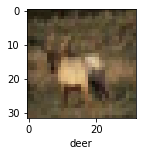

In [47]:
plot_smpl(X_train,y_train,3)

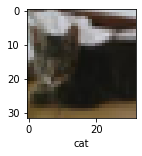

In [49]:
plot_smpl(X_train,y_train,9)

In [55]:
#normalize the array into 0 to 1
X_train[0]/255

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [56]:
X_train=X_train/255
X_test=X_test/255

In [57]:
ann=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])
ann.compile(optimizer='SGD',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])
ann.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 105s 67ms/step - loss: 1.8143 - accuracy: 0.3533
Epoch 2/5
1563/1563 [==============================] - 105s 67ms/step - loss: 1.6243 - accuracy: 0.4257
Epoch 3/5
1563/1563 [==============================] - 103s 66ms/step - loss: 1.5419 - accuracy: 0.4568
Epoch 4/5
1563/1563 [==============================] - 103s 66ms/step - loss: 1.4814 - accuracy: 0.4790
Epoch 5/5
1563/1563 [==============================] - 106s 68ms/step - loss: 1.4338 - accuracy: 0.4955


In [64]:
cnn=models.Sequential([
    
    #cnn
    layers.Conv2D(filters=32,kernel_size=(3,3), activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=32,kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    #dense
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

In [65]:
cnn.compile(optimizer='adam',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])


In [66]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 44s 28ms/step - loss: 1.4792 - accuracy: 0.4675
Epoch 2/10
1563/1563 [==============================] - 44s 28ms/step - loss: 1.1305 - accuracy: 0.6027
Epoch 3/10
1563/1563 [==============================] - 43s 28ms/step - loss: 1.0093 - accuracy: 0.6485
Epoch 4/10
1563/1563 [==============================] - 43s 28ms/step - loss: 0.9355 - accuracy: 0.6746
Epoch 5/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.8690 - accuracy: 0.6993
Epoch 6/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.8228 - accuracy: 0.7152
Epoch 7/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.7766 - accuracy: 0.7316
Epoch 8/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.7374 - accuracy: 0.7443
Epoch 9/10
1563/1563 [==============================] - 43s 28ms/step - loss: 0.7014 - accuracy: 0.7542
Epoch 10/10
1563/1563 [==============================] - 44s 28m

In [67]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.9752 - accuracy: 0.6816


[0.9752054810523987, 0.6815999746322632]

In [68]:
 y_test=y_test.reshape(-1,)

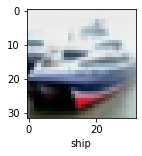

In [69]:
plot_smpl(X_test,y_test,1)

In [70]:
y_pred=cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 4s 12ms/step


array([[9.77075566e-03, 7.66376546e-03, 3.69410329e-02, 6.89073563e-01,
        2.76332535e-03, 1.95600361e-01, 2.40054168e-02, 5.25692594e-04,
        3.27276066e-02, 9.28460679e-04],
       [7.71109131e-04, 1.07605113e-02, 2.27030171e-07, 1.13801786e-08,
        6.99842850e-10, 6.19180263e-10, 3.11597792e-09, 7.40793604e-09,
        9.88357723e-01, 1.10422894e-04],
       [5.84164448e-02, 6.77721426e-02, 6.09406212e-04, 6.71271293e-04,
        1.41659155e-04, 1.57377828e-04, 3.47596288e-05, 9.42403451e-04,
        8.63423467e-01, 7.83109013e-03],
       [6.92010641e-01, 2.38703806e-02, 4.92728269e-03, 2.23970483e-03,
        2.77093844e-03, 8.29947166e-05, 1.14429367e-05, 1.20658973e-04,
        2.72286713e-01, 1.67919637e-03],
       [1.82590543e-06, 1.65344172e-05, 3.43217477e-02, 9.25428886e-03,
        2.05592915e-01, 4.94456966e-04, 7.50262618e-01, 2.74299737e-07,
        5.51717858e-05, 1.21981472e-07]], dtype=float32)

In [73]:
np.argmax(y_pred[0])

3

In [74]:
y_classes=[np.argmax(element) for element in y_pred]

In [79]:
y_classes[:10]

[3, 8, 8, 0, 6, 6, 1, 2, 3, 1]

In [80]:
y_test[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=uint8)

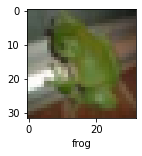

In [91]:
plot_smpl(X_test,y_test,7)

In [90]:
classes[y_classes[7]]

'bird'

SyntaxError: invalid syntax (2830201818.py, line 1)